In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

# Data set

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians women given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

Load csv file into a data frame

In [2]:
current_working_directory = os.getcwd()
print("Current working directory: ", current_working_directory)

Current working directory:  C:\Users\plust\OneDrive\Desktop\Jupyter Projects\Data Glacier\Pima Indians Diabetes


In [3]:
file_name = "pima-indians-diabetes.csv"
header_names = ["times_pregnant", "Plasma_glucose_concentration", "Diastolic_blood_pressure", "Triceps_skinfold_thickness", "2h_serum_insulin", "Body_mass_index", "Diabetes_pedigree_function", "Age", "Class"]
data_frame = pd.read_csv(current_working_directory + "\\" + file_name, names = header_names) 
data_frame

,times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skinfold_thickness,2h_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Pre-processing

#### Data Types

In [4]:
data_frame.describe()

,times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skinfold_thickness,2h_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data_frame.dtypes

times_pregnant                    int64
Plasma_glucose_concentration      int64
Diastolic_blood_pressure          int64
Triceps_skinfold_thickness        int64
2h_serum_insulin                  int64
Body_mass_index                 float64
Diabetes_pedigree_function      float64
Age                               int64
Class                             int64
dtype: object

The attributes have correct data type

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   times_pregnant                768 non-null    int64  
 1   Plasma_glucose_concentration  768 non-null    int64  
 2   Diastolic_blood_pressure      768 non-null    int64  
 3   Triceps_skinfold_thickness    768 non-null    int64  
 4   2h_serum_insulin              768 non-null    int64  
 5   Body_mass_index               768 non-null    float64
 6   Diabetes_pedigree_function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Missing Values

We know that there are missing values in the form of zero. So we are going to find out hoe many missing values every attribute has in order to decide how to deal with them.

After a Google search that I did, the attributes that should not have a 0 value are: Plasma_glucose_concentration, Diastolic_blood_pressure, Triceps_skinfold_thickness	, 2h_serum_insulin, Body_mass_index.

In [7]:
attributes_with_missing_values = ["Plasma_glucose_concentration", "Diastolic_blood_pressure", "Triceps_skinfold_thickness", "2h_serum_insulin", "Body_mass_index"]
number_of_missing_values = []
for index in range(5):
    number_of_missing_values.append(data_frame[attributes_with_missing_values[index]].value_counts()[0])

missing_values_dict = {
    "Attribute": attributes_with_missing_values,
    "# of missing values": number_of_missing_values
}
missing_values_data_frame = pd.DataFrame(missing_values_dict)
missing_values_data_frame

,Attribute,# of missing values
0,Plasma_glucose_concentration,5
1,Diastolic_blood_pressure,35
2,Triceps_skinfold_thickness,227
3,2h_serum_insulin,374
4,Body_mass_index,11


We have 768 total observations. For Plasma_glucose_concentration and Body_mass_index we can delete the rows with missing values because there are not a lot. But for Diastolic_blood_pressure, Triceps_skinfold_thickness, 2h_serum_insulin, we have a lot of missing values so we are going to replace the missing value with the mean value  of the attribute.

In [8]:
# Delete the rows that have 0 in the Plasma_glucose_concentration column
data_frame = data_frame[data_frame.Plasma_glucose_concentration != 0]
data_frame.shape

(763, 9)

In [9]:
# Delete the rows that have 0 in the Body_mass_index column
data_frame = data_frame[data_frame.Body_mass_index != 0]
data_frame.shape

(752, 9)

In [10]:
attributes_names = ["Diastolic_blood_pressure", "Triceps_skinfold_thickness", "2h_serum_insulin"]
for attribute_name in attributes_names:
    mean_value = data_frame[attribute_name].mean()
    data_frame[attribute_name].replace(0, mean_value, inplace = True)

In [11]:
data_frame.describe()

,times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skinfold_thickness,2h_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.300178,26.720695,120.291789,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.157628,9.648926,93.529708,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.715426,81.348404,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,81.348404,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that there are no longer missing values in our data.

#### Correlation

We are going to look into the correlation that attributes have. We are interested in the correlation that the Class attribute has with the other attributes and we want to know which of them has the most strong correlation.

First we create a pearson correlation matrix.

In [12]:
pearson_correlation_matrix = data_frame.corr(method = "pearson")
pearson_correlation_matrix

,times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skinfold_thickness,2h_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class
times_pregnant,1.000000,0.125717,0.205734,0.013715,-0.018230,0.018352,-0.029159,0.545238,0.213371
Plasma_glucose_concentration,0.125717,1.000000,0.219588,0.158435,0.397111,0.232771,0.133945,0.261490,0.494190
Diastolic_blood_pressure,0.205734,0.219588,1.000000,0.135565,0.010848,0.280505,0.001036,0.320725,0.159447
Triceps_skinfold_thickness,0.013715,0.158435,0.135565,1.000000,0.236140,0.536120,0.152481,0.025161,0.171703
2h_serum_insulin,-0.018230,0.397111,0.010848,0.236140,1.000000,0.189907,0.157240,0.037952,0.179849
Body_mass_index,0.018352,0.232771,0.280505,0.536120,0.189907,1.000000,0.153683,0.022144,0.309884
Diabetes_pedigree_function,-0.029159,0.133945,0.001036,0.152481,0.157240,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.320725,0.025161,0.037952,0.022144,0.031674,1.000000,0.232734
Class,0.213371,0.494190,0.159447,0.171703,0.179849,0.309884,0.178052,0.232734,1.000000


We can visualize the correlations with a heatmap in order to understand them better.

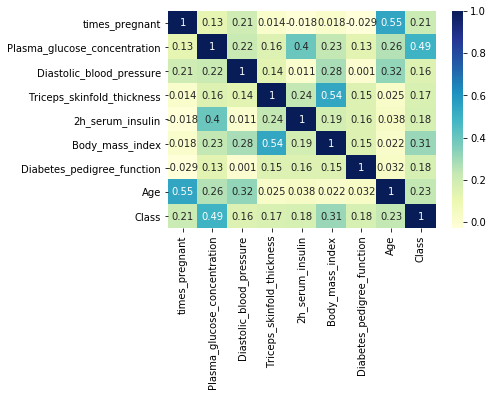

In [13]:
heatmap_plot = sb.heatmap(pearson_correlation_matrix, cmap = "YlGnBu", annot = True)

Considering the heatmap above, we can see that Plasma_glucose_concentration and Body_mass_index attributes have a modest correlation with the Class attribute. We can not come to a conclusion about correlation with these attributes.

# Create, Train and Evaluate a Model

In [14]:
data_frame

,times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skinfold_thickness,2h_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class
0,6,148,72.0,35.000000,81.348404,33.6,0.627,50,1
1,1,85,66.0,29.000000,81.348404,26.6,0.351,31,0
2,8,183,64.0,20.715426,81.348404,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,81.348404,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,20.715426,81.348404,30.1,0.349,47,1


In [15]:
data = data_frame[["times_pregnant", "Plasma_glucose_concentration", "Diastolic_blood_pressure", "Triceps_skinfold_thickness", "2h_serum_insulin", "Body_mass_index", "Diabetes_pedigree_function", "Age"]].to_numpy()
actual_labels = data_frame["Class"].to_numpy()

In [16]:
data.shape

(752, 8)

In [17]:
actual_labels.shape

(752,)

The model we are going to use is an SVM and we are going to train it with the K-fold cross validation technic. We create 10 folders of our initial dataset. 
For every folder:
- One folder is the test set
- The remaining 9 folders are the training set
- Train the model with the current training set
- Test the model with the current test set
- Compute Accuracy and F1-score

In [18]:
kf_object = KFold(n_splits = 10)
svm_model = svm.SVC() # create SVM model

accuracy_list = []
f1_score_list = []
for current_train_indices, current_test_indices in kf_object.split(data):
    current_training_dataset = data[current_train_indices[0]:current_train_indices[-1]]
    current_training_actual_labels = actual_labels[current_train_indices[0]:current_train_indices[-1]]
    
    current_test_dataset = data[current_test_indices[0]:current_test_indices[-1]]
    current_test_actual_labels = actual_labels[current_test_indices[0]:current_test_indices[-1]]
    
    svm_model.fit(current_training_dataset, current_training_actual_labels) # Train model with current training dataset
    current_test_predicted_labels = svm_model.predict(current_test_dataset) # Test model
    
    current_accuracy = accuracy_score(current_test_actual_labels, current_test_predicted_labels)
    current_f1_score = f1_score(current_test_actual_labels, current_test_predicted_labels)
    
    accuracy_list.append(current_accuracy)
    f1_score_list.append(current_f1_score)
    

In [19]:
accuracy_np = np.array(accuracy_list)
print("Mean Accuracy: ", np.mean(accuracy_np))

Mean Accuracy:  0.7682522522522524


In [20]:
f1_score_np = np.array(f1_score_list)
print("Mean F1-score: ", np.mean(f1_score_np))

Mean F1-score:  0.5979985105095145


At the end we train our model again, with the whole dataset.

In [21]:
svm_model.fit(data, actual_labels) # Train model with all the data.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Save Model

In [22]:
# import pickle library 
import pickle # pickle used for serializing and de-serializing a Python object structure

# save the model
read_fd = open("model.pkl","wb") # open the file for writing
pickle.dump(svm_model, read_fd) # dumps an object to a file object
read_fd.close() # here we close the fileObject

# Load Model

In [23]:
# Load the model
load_fd = open("model.pkl","rb")# open the file for reading
model = pickle.load(load_fd) # load the object from the file into new_model
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
predicted_class = model.predict([[6, 148, 72.0, 35.000000, 81.348404, 33.6, 0.627, 50]])
print("The predicted class of the observation is: ", predicted_class[0])

The predicted class of the observation is:  1
